In [1]:
import pandas as pd
import json

# =============================================加载数据===================================

# 加载数据 --credits
credits = pd.read_csv(r'E:\DataBase\movie_feature\modify\tmdb_5000_credits.csv')
# print('credits:\n', credits)
# print('*' * 100)
print('credits columns:', credits.columns)
# print('*' * 100)
# print('credits:\n', credits.info())
# print('*' * 100)

# 加载数据
movies = pd.read_csv(r'E:\DataBase\movie_feature\modify\tmdb_5000_movies.csv')
# print('movies:\n', movies)
# print('#' * 100)
print('movies columns:', movies.columns)
# print('#' * 100)
# print('movies:\n', movies.info())
# print('#' * 100)

credits columns: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
movies columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [2]:
# （1）合并数据
# print(credits['crew'])
# credits 中存在 movie_id  和 title
# movies 中存在 id 和 title
# 将 credits 中的 movie_id 修改为 id
credits.rename(columns={'movie_id': 'id'}, inplace=True)
# print('credits的列索引：\n', credits.columns)
# 主键合并 ---on id 和 title
all_data = pd.merge(left=credits, right=movies, on=['id', 'title'], how='outer')
print('all_data:\n', all_data)
print('all_data columns:\n', all_data.columns)
print('all_data dtypes:\n', all_data.dtypes)

all_data:
           id                                     title  \
0      19995                                    Avatar   
1        285  Pirates of the Caribbean: At World's End   
2     206647                                   Spectre   
3      49026                     The Dark Knight Rises   
4      49529                               John Carter   
...      ...                                       ...   
4798    9367                               El Mariachi   
4799   72766                                 Newlyweds   
4800  231617                 Signed, Sealed, Delivered   
4801  126186                          Shanghai Calling   
4802   25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba... 

In [3]:
print('type all_data:',type(all_data))

type all_data: <class 'pandas.core.frame.DataFrame'>


In [4]:
select_cols=['title']
all_data[select_cols]

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4798,El Mariachi
4799,Newlyweds
4800,"Signed, Sealed, Delivered"
4801,Shanghai Calling


In [5]:
# 筛选特征
select_cols2 = ['original_title', 'crew', 'release_date', 'genres', 'keywords', 
                     'production_companies', 'production_countries', 'revenue', 
                     'budget', 'runtime', 'vote_average']
all_data2 = all_data[select_cols2]
print('all_data的列索引：\n', all_data2.columns)
print('all_data的形状：\n', all_data2.shape)


all_data的列索引：
 Index(['original_title', 'crew', 'release_date', 'genres', 'keywords',
       'production_companies', 'production_countries', 'revenue', 'budget',
       'runtime', 'vote_average'],
      dtype='object')
all_data的形状：
 (4803, 11)


In [6]:
# 增加利润
all_data2['profit'] = all_data2['revenue'] - all_data2['budget']
print('all_data的列索引：\n', all_data2)
print('all_data的形状：\n', all_data2)


all_data的列索引：
                                 original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                                   crew release_date  \
0     [{"credit_id": "52fe48009251416c750aca23", "de...   2009-12-10   
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...   2007-05-19   
2     [{"credit_id": "54805967c3a36829b5002c41", "de...   2015-10-26   
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...   2012-07-16   
4     [{"credit_id": "52

C:\Users\16340\AppData\Local\Temp/ipykernel_18660/4119344063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2['profit'] = all_data2['revenue'] - all_data2['budget']


In [7]:
all_data2.loc[:, 'release_date'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Name: release_date, Length: 4803, dtype: bool

In [8]:
all_data.loc[:, 'title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [9]:
# 检测缺失值
# pd.isnull + sum
res_null = pd.isnull(all_data2).sum()
print('缺失值检测结果：\n', res_null)

# 检测到 release_date 存在一个缺失值 ---针对方式：填充，查找具体的电影名称，根据电影名称查找上映时间
# a、确定bool数组
mask = all_data2.loc[:, 'release_date'].isnull()
# b、根据bool数组来获取缺失值位置的电影名称
# select_cols3= [mask, 'title'] # ------------------------------------------------------------------------------ #
movie_name = all_data.loc[mask, 'title']
print('缺失上映日期的电影名称为：\n', movie_name)
# 缺失上映日期的电影名称为：
#  4553    America Is Still the Place
# Name: title, dtype: object

# 通过上网查询该电影的上映日期为：2014-06-01
# c 、 填充
all_data2.loc[mask, 'release_date'] = '2014-06-01'

# 将 release_date 转化为 pandas支持的时间序列
all_data2.loc[:, 'release_date'] = pd.to_datetime(all_data2.loc[:, 'release_date'])

# 获取 发行年份
all_data2.loc[:, 'release_year'] = all_data2.loc[:, 'release_date'].dt.year


缺失值检测结果：
 original_title          0
crew                    0
release_date            1
genres                  0
keywords                0
production_companies    0
production_countries    0
revenue                 0
budget                  0
runtime                 2
vote_average            0
profit                  0
dtype: int64
缺失上映日期的电影名称为：
 4553    America Is Still the Place
Name: title, dtype: object


C:\Users\16340\AppData\Local\Temp/ipykernel_18660/2182171468.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'release_date'] = pd.to_datetime(all_data2.loc[:, 'release_date'])
C:\Users\16340\AppData\Local\Temp/ipykernel_18660/2182171468.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'release_year'] = all_data2.loc[:, 'release_date'].dt.year


In [10]:
# 查看电影风格数据
print('电影风格：\n', all_data2.loc[:, 'genres'])  # json数据类型

# json.loads # 可以将json转化为python类型
# 将 all_data.loc[:, 'genres'] 由 json类型转化为 python类型
all_data2.loc[:, 'genres'] = all_data2.loc[:, 'genres'].transform(json.loads)

# 构建所有的电影的类型
all_movie_type = set()


# 定义一个函数，来提取电影类型
def get_movie_type(val):
    """
    获取电影类型
    :param val: 数据
    :return: 提取之后的电影类型数据
    """
    # 构建一个空列表，用来存储每一个电影的电影类型
    type_list = []
    # 遍历 列表
    for item in val:
        # 如果item存在
        if item:
            # 获取该电影的电影类型
            movie_type = item['name']
            # 将其加入到 type_list
            type_list.append(movie_type)
            # 将其加入到 all_movie_type
            all_movie_type.add(movie_type)

    return ','.join(type_list)


# 调用
all_data2.loc[:, 'genres'] = all_data2.loc[:, 'genres'].transform(get_movie_type)

print('获取电影类型之后的结果：\n', all_data2.loc[:, 'genres'])

# 将所有的电影类型转化为 list
all_movie_type = list(all_movie_type)

# 遍历
for column in all_movie_type:
    # 先增加
    all_data.loc[:, column] = 0

    # 构建bool数组
    mask = all_data2.loc[:, 'genres'].str.contains(column)
    # 修改
    all_data2.loc[mask, column] = 1

print('all_data:\n', all_data)


电影风格：
 0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object
获取电影类型之后的结果：
 0       Action,Adventure,Fantasy,Science Fiction
1                       Adventure,Fantasy,Action
2                         Action,Adventure,Crime
3                    Action,Crime,Drama,Thriller
4               Action,Adventure,Science Fiction
                          ...                   
4798 

C:\Users\16340\AppData\Local\Temp/ipykernel_18660/677600267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'genres'] = all_data2.loc[:, 'genres'].transform(json.loads)
C:\Users\16340\AppData\Local\Temp/ipykernel_18660/677600267.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'genres'] = all_data2.loc[:, 'genres'].transform(get_movie_type)
C:\Users\16340\AppData\Local\Temp/ipykernel_18660/677600267.py:51: SettingWithCopyWarning: 
A value is trying to be set on a co

all_data:
           id                                     title  \
0      19995                                    Avatar   
1        285  Pirates of the Caribbean: At World's End   
2     206647                                   Spectre   
3      49026                     The Dark Knight Rises   
4      49529                               John Carter   
...      ...                                       ...   
4798    9367                               El Mariachi   
4799   72766                                 Newlyweds   
4800  231617                 Signed, Sealed, Delivered   
4801  126186                          Shanghai Calling   
4802   25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba... 

C:\Users\16340\AppData\Local\Temp/ipykernel_18660/677600267.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[mask, column] = 1
C:\Users\16340\AppData\Local\Temp/ipykernel_18660/677600267.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[mask, column] = 1
C:\Users\16340\AppData\Local\Temp/ipykernel_18660/677600267.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [11]:
# 需求：
# （1）电影类型如何随着时间的推移发生变化的？
# 电影类型、 ---genres（电影风格）
# 时间 ------ release_date (首次上映时间)
# 每一年各种电影的变化趋势。
# 按照发行年份进行分组，统计各个电影各个年份的数量
res = all_data2.groupby(by='release_year')[all_movie_type].sum()
print('res:\n',res.tail())

# 根据 res 进行结果可视化


res:
               Music  Mystery  Adventure  Fantasy  Comedy  History   War  \
release_year                                                              
2013           12.0      5.0       36.0     21.0    71.0      8.0   3.0   
2014            9.0     15.0       37.0     16.0    62.0      7.0  10.0   
2015            8.0     20.0       35.0     10.0    52.0      9.0   2.0   
2016            1.0      6.0       23.0     13.0    26.0      6.0   3.0   
2017            0.0      0.0        0.0      0.0     1.0      0.0   0.0   

              Crime  Family  Animation  Foreign  Horror  Thriller  TV Movie  \
release_year                                                                  
2013           37.0    22.0       17.0      0.0    25.0      53.0       2.0   
2014           27.0    23.0       14.0      0.0    21.0      66.0       0.0   
2015           26.0    17.0       13.0      0.0    33.0      67.0       0.0   
2016           10.0     9.0        4.0      0.0    20.0      27.0       0

C:\Users\16340\AppData\Local\Temp/ipykernel_18660/3009058602.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, alpha=0.2)


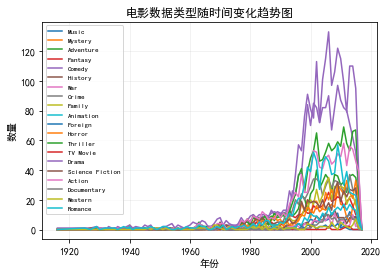

In [12]:
import matplotlib.pyplot as plt
groupby_year=res
# 创建画布
plt.figure()
# 默认不支持中文 ---修改RC参数
plt.rcParams['font.sans-serif'] = 'SimHei'
# 增加字体之后变得不支持负号，需要修改RC参数让其继续支持负号
plt.rcParams['axes.unicode_minus'] = False
# 构建横轴数据
x = groupby_year.index
for movie_type in groupby_year.columns:
    # 构建纵轴数据
    y = groupby_year[movie_type]
    # 绘制折线图
    plt.plot(x, y)
# 增加标题
plt.title('电影数据类型随时间变化趋势图')
# 设置图例
plt.legend(groupby_year.columns, fontsize='x-small')
# 设置纵轴名称
plt.ylabel('数量')
# 设置横轴名称
plt.xlabel('年份')
# 增加网络曲线
plt.grid(b=True, alpha=0.2)
# 保存图片
plt.savefig('./电影数据类型随时间变化')
# 展示
plt.show()


In [13]:
# 导包
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

movie_type_sum = all_data2[list(all_movie_type)].sum(axis=0).sort_values()
print('movie_type_sum:\n', movie_type_sum.tail())

# 1、实例化
bar = Bar(
    # 初始化配置
    init_opts=opts.InitOpts(
        width='2000px',  # 画布宽度
        height='1000px',  # 画布高度
        theme=ThemeType.WHITE,  # 主题 设置方式
    )
)

# 2、添加数据
# 横轴数据
bar.add_xaxis(
    movie_type_sum.index.tolist()
)

# 纵轴数据
bar.add_yaxis(
    '',
    movie_type_sum.values.tolist(),
    color='#6495ED'
)

# 3、增加系列配置
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=False  # 不展示标签
    )
)

# 4、增加全局配置
bar.set_global_opts(
    title_opts=opts.TitleOpts(
        title='各种电影类型数量统计柱状图',  # 标题名字
        pos_left='center'  # 标题位置
    ),
    legend_opts=opts.LegendOpts(
        is_show=True  # 展示图列
    ),
    xaxis_opts=opts.AxisOpts(
        name='数量'  # 横轴名称
    ),
    yaxis_opts=opts.AxisOpts(
        name='电影类型'  # 纵轴名称
    )
)

# 图形水平
bar.reversal_axis()

# 5、生成文件
bar.render('./各种电影类型数量统计柱状图.html')


movie_type_sum:
 Romance      894.0
Action      1154.0
Thriller    1274.0
Comedy      1722.0
Drama       2297.0
dtype: float64


'E:\\JupyterNotebook\\ID3\\各种电影类型数量统计柱状图.html'

In [14]:
# 导包
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# 1、实例化
pie = Pie(
    # 初始化配置
    init_opts=opts.InitOpts(
        width='2000px',  # 画布宽度
        height='1000px',  # 画布高度
        theme=ThemeType.WHITE,  # 主题 设置方式
    )
)

# 2、添加数据
pie.add(
    '',
    data_pair=[list(x) for x in zip(list(movie_type_sum.index), movie_type_sum.values.tolist())],
    radius=['20%', '75%']  # 内径，外径
)

# 3、增加系列配置
pie.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=True,  # 展示标签
        formatter='{b}{d}'  # 数据显示的样式
    )
)

# 4、增加全局配置
pie.set_global_opts(
    title_opts=opts.TitleOpts(
        title='各种电影类型占比饼图',  # 标题名字
        pos_left='center'  # 标题位置
    ),
    legend_opts=opts.LegendOpts(
        is_show=False  # 不展示图列
    )
)

# 5、生成文件
pie.render('./各种电影类型占比饼图.html')


'E:\\JupyterNotebook\\ID3\\各种电影类型占比饼图.html'

In [15]:
# 电影类型及利润的关系
#  all_data  --电影类型已存在
#  利润 --- 收入 - 预算
# 计算 利润
all_data2.loc[:, 'profit'] = all_data2.loc[:, 'revenue'] - all_data2.loc[:, 'budget']
print('利润：\n', all_data2.loc[:, 'profit'])
# 对比 各种电影类型 的 平均利润 ---柱状图
#  Music ---> profit  --- sum   / music 电影的数量 count  ===>平均每一个music电影的利润
#
# 不能使用分组聚合  --存在多列的数据为电影类型
# 构建一个list来存储各种类型电影的平均利润
movie_type_profit = []
# 遍历 所有的 电影类型
for column in all_movie_type:
    # column : 各种电影类型
    # 确定bool数组 ---为True的电影，属于column类型
    mask = all_data2.loc[:, column] == 1
    # 筛选 column 类型电影 --该类型电影利润的平均值
    mean_profit = all_data2.loc[mask, 'profit'].mean()

    # 加入到 movie_type_profit
    movie_type_profit.append(mean_profit)

print(all_movie_type)
print(movie_type_profit)
# 创建series
res_series = pd.Series(data=movie_type_profit, index=all_movie_type).sort_values()
print('res_series:\n', res_series)


利润：
 0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4798       1820920
4799         -9000
4800             0
4801             0
4802             0
Name: profit, Length: 4803, dtype: int64
['Music', 'Mystery', 'Adventure', 'Fantasy', 'Comedy', 'History', 'War', 'Crime', 'Family', 'Animation', 'Foreign', 'Horror', 'Thriller', 'TV Movie', 'Drama', 'Science Fiction', 'Action', 'Documentary', 'Western', 'Romance']
[32548004.232432432, 47556440.54885057, 142333343.1493671, 129793639.92924528, 45976077.69976771, 27620095.43654822, 48873416.88888889, 38300853.75287356, 111625982.58089669, 159227123.1153846, -293436.9411764706, 28971045.61078998, 49076083.86577708, -1150000.0, 31437906.75968655, 100590964.26168224, 89702346.5476603, 7185599.572727272, 19167262.31707317, 39691028.86129754]
res_series:
 TV Movie          -1.150000e+06
Foreign           -2.934369e+05
Documentary        7.185600e+06
Western            1.916726e+07
H

C:\Users\16340\AppData\Local\Temp/ipykernel_18660/226662064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'profit'] = all_data2.loc[:, 'revenue'] - all_data2.loc[:, 'budget']


In [16]:
# 可视化 ---比 各种电影类型 的 平均利润 ---柱状图
# Pyecharts
# 实例化对象
bar = Bar(
    # 初始化配置
    init_opts=opts.InitOpts(
        width='900px',
        height='600px',
        theme="white"
    )
)

# 添加数据
bar.add_xaxis(
    xaxis_data=res_series.index.tolist()
)

bar.add_yaxis(
    series_name=' ',
    y_axis=[float('%.2f' % i) for i in (res_series / 1000000)],
    #y_axis=usa_new
    color='#6495ED'
)

# 设置全局配置
bar.set_global_opts(
    # 标题
    title_opts=opts.TitleOpts(
        title='各种电影类型利润统计柱状图',
        # subtitle='广州分校Python0421班级'
        pos_left='center',
        pos_top='3%'
    ),
    # 图例
    legend_opts=opts.LegendOpts(
        is_show=False,
    ),
    # 横轴坐标设置
    xaxis_opts=opts.AxisOpts(
        name='利润(百万)'
    ),
    # # 坐标系设置
    yaxis_opts=opts.AxisOpts(
        name='电影类型'
    )
)

# 设置系列配置
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=True,
        position='right',
        color='#000000',
        formatter='{c}'
    )
)
# 反转坐标轴
bar.reversal_axis()

# 生成文件
bar.render('./各种电影类型利润统计柱状图.html')


'E:\\JupyterNotebook\\ID3\\各种电影类型利润统计柱状图.html'

In [17]:
# 3、Universal Pictures 和 Paramount Pictures 两家影视公司发行 电影的对比情况如何？
# 如何决定 某个电影 属于哪家公司？
#  production_companies 制作公司
print('查看制作公司字段：\n', all_data2.loc[:, 'production_companies'])  # json字符串数据
# print('查看制作公司字段：\n',type(all_data.loc[0,'production_companies']))
# 只要 production_companies 数据里面包含Universal Pictures  ---该电影属于Universal Pictures
# 只要 production_companies 数据里面包含Paramount Pictures  ---该电影属于Paramount Pictures
# 先增加两列数据
all_data2.loc[:, 'Universal Pictures'] = 0
all_data2.loc[:, 'Paramount Pictures'] = 0
# 判断 ---bool数组
mask1 = all_data2.loc[:, 'production_companies'].str.contains('Universal Pictures')
# 修改
all_data2.loc[mask1, 'Universal Pictures'] = 1

# 判断 --bool数组
mask2 = all_data2.loc[:, 'production_companies'].str.contains('Paramount Pictures')
# 修改
all_data2.loc[mask2, 'Paramount Pictures'] = 1

print('all_data:\n', all_data)
# 保存
all_data2.to_excel('./contrast.xlsx')


C:\Users\16340\AppData\Local\Temp/ipykernel_18660/3887508905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'Universal Pictures'] = 0
C:\Users\16340\AppData\Local\Temp/ipykernel_18660/3887508905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'Paramount Pictures'] = 0


查看制作公司字段：
 0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4798             [{"name": "Columbia Pictures", "id": 5}]
4799                                                   []
4800    [{"name": "Front Street Pictures", "id": 3958}...
4801                                                   []
4802    [{"name": "rusty bear entertainment", "id": 87...
Name: production_companies, Length: 4803, dtype: object
all_data:
           id                                     title  \
0      19995                                    Avatar   
1        285  Pirates of the Caribbean: At World's End   
2     206647                                   Spectre   
3      49026                     The Dark Knight Ris

In [18]:
# 比较两家公司总的发行量对比饼图
# 发行量计算
res_pie = all_data2.loc[:, ['Universal Pictures', 'Paramount Pictures']].sum()
print('res_pie:\n', res_pie)
# # Pyecharts
#
pie = Pie(
    # 初始化配置
    init_opts=opts.InitOpts(
        width='900px',
        height='500px',
        theme="white"
    )
)
# 准备数据
data_pair = [(k, v) for k, v in zip(res_pie.index.tolist(), res_pie.tolist())]
print('data_pair:\n', data_pair)

# 添加数据
pie.add(
    series_name=res_pie.index.tolist(),
    data_pair=data_pair,
    radius=['30%', '70%'],
    # rosetype='radius'
)

# 设置全局配置
pie.set_global_opts(
    # 标题
    title_opts=opts.TitleOpts(
        title='各家公司发行电影数量占比饼图',
        # subtitle='广州分校Python0421班级'
        pos_left='center',
        pos_top='3%'
    ),
    # 图例
    legend_opts=opts.LegendOpts(
        is_show=False,
        # type_='scroll'
    ),
)
# 设置系列配置
pie.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=True,
        color='#000000',
        formatter='{b}:{c}'
    )
)
# 生成文件
pie.render('./各家公司发行电影数量占比饼图.html')


res_pie:
 Universal Pictures    314
Paramount Pictures    285
dtype: int64
data_pair:
 [('Universal Pictures', 314), ('Paramount Pictures', 285)]


'E:\\JupyterNotebook\\ID3\\各家公司发行电影数量占比饼图.html'

In [19]:
import numpy as np

res_line:
               Universal Pictures  Paramount Pictures
release_year                                        
1916                           0                   0
1925                           0                   0
1927                           0                   1
1929                           0                   0
1930                           0                   0
...                          ...                 ...
2013                           9                   8
2014                          10                   8
2015                          13                   7
2016                          10                   5
2017                           0                   0

[90 rows x 2 columns]


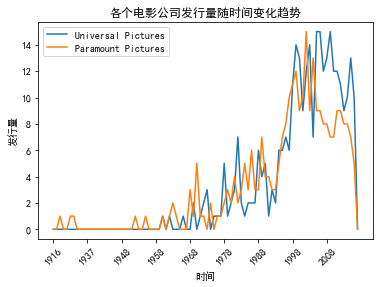

In [20]:
# 查看两家公司发行量随时间变化趋势
# 按照 release_year分组，统计两家公司每年的发行数量
res_line = all_data2.groupby(by='release_year')[['Universal Pictures', 'Paramount Pictures']].sum()
print('res_line:\n', res_line)

# 绘制折线图
# 创建画布
plt.figure()
# 默认不支持中文 ---修改RC参数
plt.rcParams['font.sans-serif'] = 'SimHei'
# 增加字体之后变得不支持负号，需要修改RC参数让其继续支持负号
plt.rcParams['axes.unicode_minus'] = False
# 绘图
# 准备x
x = np.arange(res_line.shape[0])

# 准备y
y = res_line.values

# 绘图
plt.plot(x, y)

# 增加标题
plt.title('各个电影公司发行量随时间变化趋势')
# 图例
plt.legend(res_line.columns)
# 横轴名称
plt.xlabel('时间')
# 纵轴名称
plt.ylabel('发行量')
# 横轴刻度
plt.xticks(x[::10], res_line.index[::10], rotation=45)
# 展示
plt.show()


In [25]:
#  4、 改编电影和原创电影的对比情况如何？
# 如何确定电影是改编的？还是原创的呢？
#  与电影相关的关键字  keywords
# 如果在这里是根据小说改编的 base on novel/fairy tale/.....
# 只要出现 base on 这个字眼 就说明 是改编的
# 查看 keywords
print('查看 keywords:\n', all_data2.loc[:, 'keywords'])

# 先增加一列
all_data2.loc[:, 'not_original'] = 'original'

# 确定bool数组，如果是改编的，那就将 not_original 修改为1
mask = all_data2.loc[:, 'keywords'].str.contains('based on')
# 修改
all_data2.loc[mask, 'not_original'] = 'not_original'

print('all_data:\n', all_data)

# 保存
# all_data.to_excel('./hhhhh.xlsx')

# 按照是否原创进行分组，统计原创电影的平均预算、收入、利![](https://p3-juejin.byteimg.com/tos-cn-i-k3u1fbpfcp/985f069f07bc4778bced184a31074927~tplv-k3u1fbpfcp-zoom-1.image)润
res_not_original = all_data2.groupby(by='not_original')[['budget', 'revenue', 'profit']].mean()
print('res_not_original:\n', res_not_original)


查看 keywords:
 0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4798    [{"id": 5616, "name": "united states\u2013mexi...
4799                                                   []
4800    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4801                                                   []
4802    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4803, dtype: object
all_data:
           id                                     title  \
0      19995                                    Avatar   
1        285  Pirates of the Caribbean: At World's End   
2     206647                                   Spectre   
3      49026                     The Dark Knight Rises   
4  

C:\Users\16340\AppData\Local\Temp/ipykernel_18660/4254985896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'not_original'] = 'original'


In [22]:
# 可视化
# Pyecharts
# 实例化对象
bar = Bar(
    # 初始化配置
    init_opts=opts.InitOpts(
        width='900px',
        height='600px',
        theme="white"
    )
)

# 添加数据
bar.add_xaxis(
    xaxis_data=res_not_original.columns.tolist()
)

bar.add_yaxis(
    series_name='not_original',
    y_axis=res_not_original.loc['not_original', :].tolist(),
    # color='#6495ED'
    gap='0%',
)

bar.add_yaxis(
    series_name='original',
    y_axis =res_not_original.loc['original', :].tolist(),
    # color='#6495ED',
    category_gap='60%'
)
# 设置全局配置
bar.set_global_opts(
    # 标题
    title_opts=opts.TitleOpts(
        title='原创与非原创电影预算、收入、利润对比柱状图',
        # subtitle='广州分校Python0421班级'
        pos_left='center',
        # pos_top='3%'
    ),
    # 图例
    legend_opts=opts.LegendOpts(
        is_show=True,
        pos_top='5%'
    ),
    # 横轴坐标设置
    xaxis_opts=opts.AxisOpts(
        name='对比字段'
    ),
    # # 坐标系设置
    yaxis_opts=opts.AxisOpts(
        name='预算、收入、利润'
    )
)

# 设置系列配置
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=True,
        position='top',
        color='#000000',
        formatter='{c}'
    )
)

# 生成文件
bar.render('./原创与非原创电影预算、收入、利润对比柱状图.html')


'E:\\JupyterNotebook\\ID3\\原创与非原创电影预算、收入、利润对比柱状图.html'

In [23]:
# 5、电影时长与电影票房及评分的关系
# 电影票房 ---收入 ---revenue
# 评分 --- vote_average
# 电影时长 ----runtime
print('查看电影时长、票房、评分：\n', all_data2.loc[:, ['runtime', 'revenue', 'vote_average']])
# 电影时长存在缺失值
# 查询缺时长的电影，然后 ---查询具体的电影时长，填充
# 确定bool数组
mask = all_data2.loc[:, 'runtime'].isnull()
# 筛选缺失的电影名称
# # movie_name = all_data2.loc[mask, 'title']

# print('缺失时长的电影名称为：\n', movie_name)
#  缺失时长的电影名称为：
#  2656    Chiamatemi Francesco - Il Papa della gente  94分钟
# 4140                   To Be Frank, Sinatra at 100  81分钟
# Name: title, dtype: object

# 填充
# all_data2.loc[all_data2.loc[:, 'title'] == 'Chiamatemi Francesco - Il Papa della gente', 'runtime'] = 94
# all_data2.loc[all_data2.loc[:, 'title'] == 'To Be Frank, Sinatra at 100', 'runtime'] = 81

# 电影时长与电影票房及评分的关系
# 按照 电影时长 分组，查看不同电影时长的平均票房、平均评分
# 对比不同的时长段的电影的平均票房、平均评分
# 对电影时长进行离散化
# 等宽、等频、自定义
#  自定义分组
bins = [0, 60, 90, 120, 150, 180, 210, 350]
# 进行离散化
all_data2.loc[:, 'runtime'] = pd.cut(x=all_data.loc[:, 'runtime'],
                                    bins=bins,
                                    include_lowest=True)
# 分组聚合
res_runtime = all_data2.groupby(by='runtime')[['revenue', 'vote_average']].mean().sort_values(
    by=['revenue', 'vote_average'])

print('res_runtime:\n', res_runtime)


查看电影时长、票房、评分：
       runtime     revenue  vote_average
0       162.0  2787965087           7.2
1       169.0   961000000           6.9
2       148.0   880674609           6.3
3       165.0  1084939099           7.6
4       132.0   284139100           6.1
...       ...         ...           ...
4798     81.0     2040920           6.6
4799     85.0           0           5.9
4800    120.0           0           7.0
4801     98.0           0           5.7
4802     90.0           0           6.3

[4803 rows x 3 columns]
res_runtime:
                      revenue  vote_average
runtime                                   
(-0.001, 60.0]  8.057782e+05      3.931818
(60.0, 90.0]    4.043192e+07      5.500485
(210.0, 350.0]  5.149638e+07      7.100000
(90.0, 120.0]   6.739394e+07      6.078404
(120.0, 150.0]  1.534557e+08      6.660955
(180.0, 210.0]  1.842725e+08      6.931250
(150.0, 180.0]  2.471128e+08      7.071654


C:\Users\16340\AppData\Local\Temp/ipykernel_18660/3086417727.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2.loc[:, 'runtime'] = pd.cut(x=all_data.loc[:, 'runtime'],


In [24]:
# 绘图
# 可视化
# Pyecharts
# 实例化对象
bar = Bar(
    # 初始化配置
    init_opts=opts.InitOpts(
        width='900px',
        height='600px',
        theme="purple-passion"
    )
)

# 添加数据
bar.add_xaxis(
    xaxis_data=[str(tmp) for tmp in res_runtime.index]
)

bar.add_yaxis(
    series_name='revenue',
    y_axis =res_runtime.loc[:, 'revenue'].tolist(),
    # color='#6495ED'
    gap='0%',
    yaxis_index=0
)

bar.add_yaxis(
    series_name='vote_average',
    y_axis =res_runtime.loc[:, 'vote_average'].tolist(),
    # color='#6495ED',
    category_gap='60%',
    yaxis_index=1,
)
# 增加坐标轴
bar.extend_axis(
    # 增加纵轴
    yaxis=opts.AxisOpts(
        type_='value',  # 数值轴
        min_=0,
        max_=10,
        position='right',
        offset=0,
        name='评分',
        axislabel_opts=opts.LabelOpts(
            formatter='{value}'
        )
    )
)

# 设置全局配置
bar.set_global_opts(
    # 标题
    title_opts=opts.TitleOpts(
        title='不同时长的电影票房、评分的对比柱状图',
        # subtitle='广州分校Python0421班级'
        pos_left='center',
        # pos_top='3%'
    ),
    # 图例
    legend_opts=opts.LegendOpts(
        is_show=True,
        pos_top='5%'
    ),
    # 横轴坐标设置
    xaxis_opts=opts.AxisOpts(
        name='时间段'
    ),
    # # 坐标系设置
    yaxis_opts=opts.AxisOpts(
        name='票房'
    ),
    tooltip_opts=opts.TooltipOpts(
        formatter='{c}',
        trigger='axis',
        axis_pointer_type='cross'
    )
)

# 设置系列配置
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=False,
        position='top',
        color='#000000',
        formatter='{c}',
    )
)

# 生成文件
bar.render('./不同时长的电影票房、评分的对比柱状图.html')


'E:\\JupyterNotebook\\ID3\\不同时长的电影票房、评分的对比柱状图.html'